In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('/content/drive/MyDrive/SupervisedML_Y3/acquiredDataset.csv')

In [40]:
df.shape

(3735, 11)

In [41]:
df.head()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683,0
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750,0
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251,0
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825,0
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471,0


In [42]:
df.describe()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
count,3735.000000,3735.000000,3.735000e+03,3.735000e+03,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3.735000e+03,3735.00000
mean,48.214726,56.577510,5.187714e+05,1.362420e+05,33413.343775,30580.759036,25640.069076,23276.979384,8117.130388,2.087258e+05,0.42838
std,21.876949,19.066577,5.997837e+05,2.175501e+05,51970.930842,52681.858764,37159.039642,43921.116122,15522.904383,3.297073e+05,0.49491
min,1.000000,1.000000,2.160000e+02,1.380000e+02,32.000000,9.000000,2.000000,3.000000,6.000000,4.700000e+01,0.00000
25%,35.000000,43.000000,7.199650e+04,2.347200e+04,7402.000000,6908.500000,6240.000000,4862.000000,2247.000000,5.683000e+03,0.00000
50%,48.000000,56.000000,2.773820e+05,5.797200e+04,16481.000000,14928.000000,13841.000000,9739.000000,4440.000000,5.719800e+04,0.00000
75%,63.000000,69.000000,7.780680e+05,1.514855e+05,37721.500000,33147.500000,30236.000000,20796.500000,8813.000000,2.576875e+05,1.00000
max,100.000000,100.000000,3.598743e+06,3.194358e+06,699008.000000,785947.000000,595549.000000,443589.000000,289281.000000,2.328370e+06,1.00000


<Axes: >

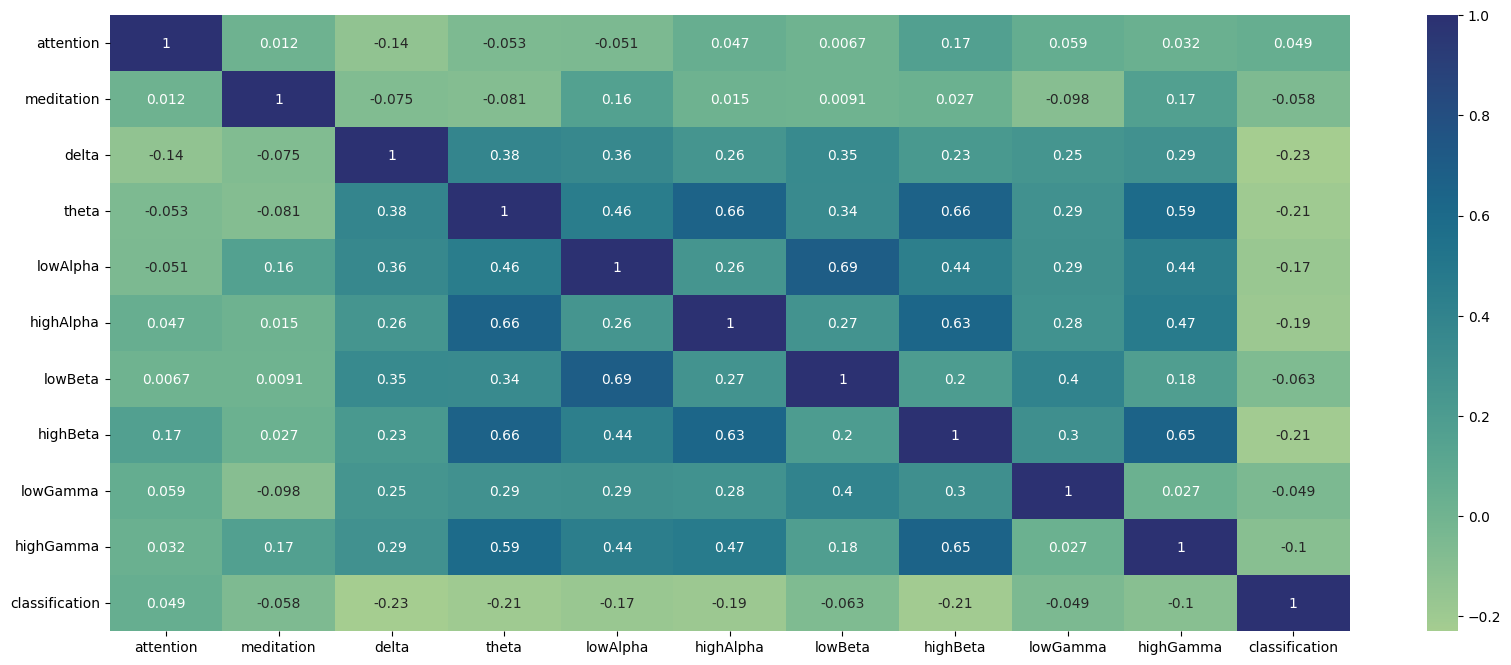

In [43]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), cmap="crest", annot=True)

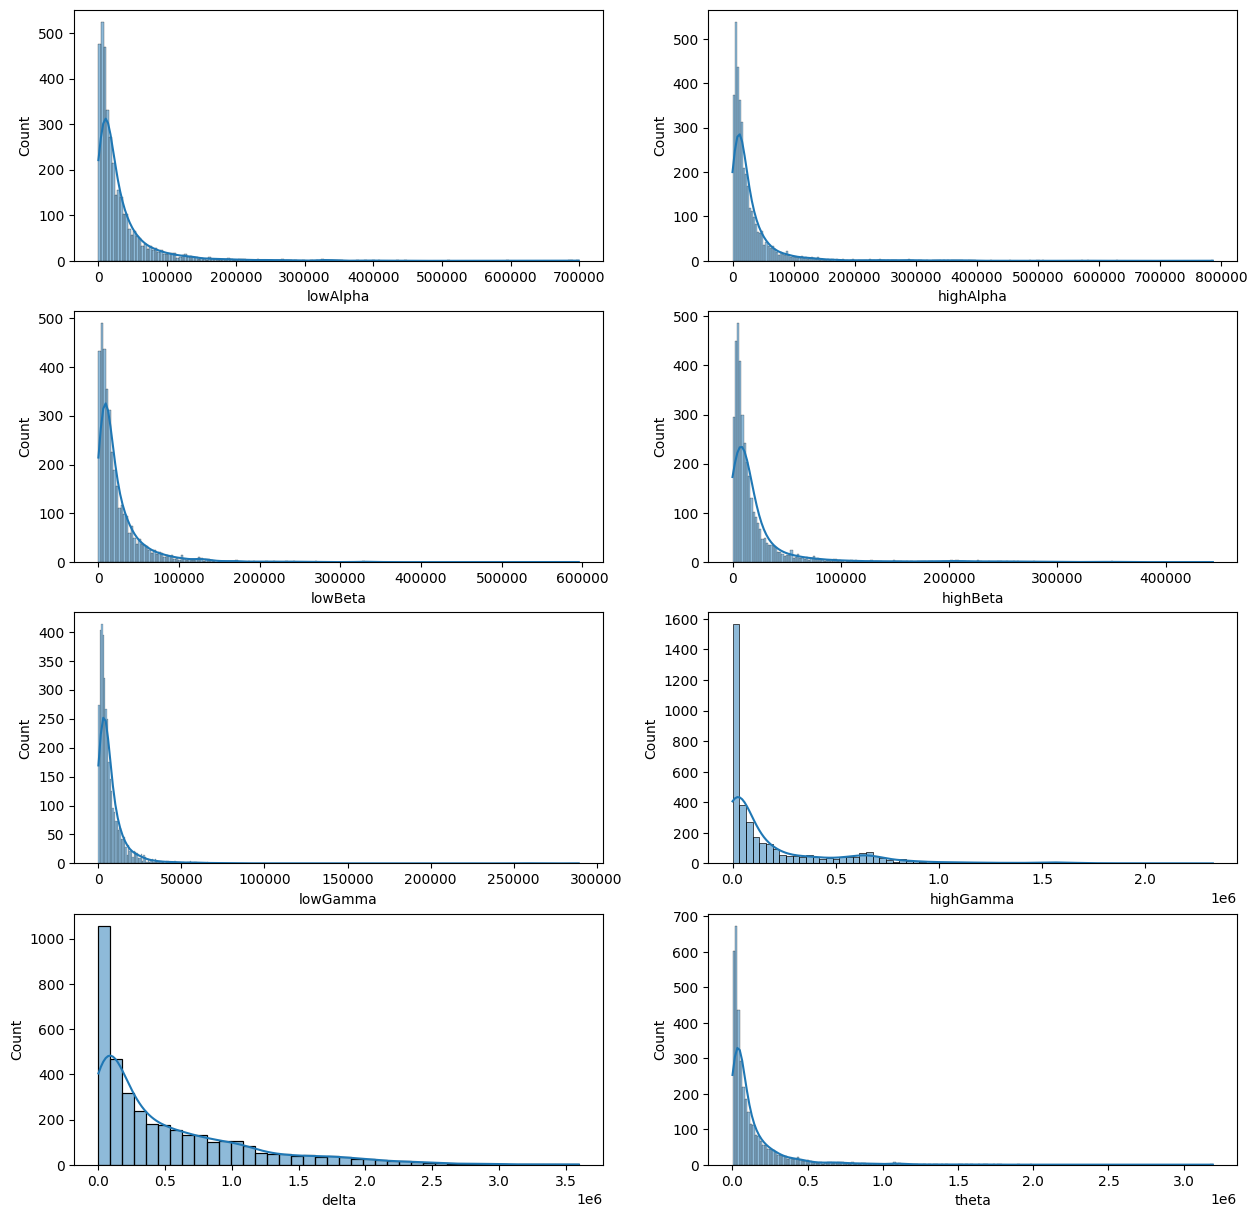

In [44]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

sns.histplot(data=df, x="lowAlpha", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="highAlpha", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="lowBeta", kde=True,  ax=axs[1, 0])
sns.histplot(data=df, x="highBeta", kde=True,  ax=axs[1, 1])
sns.histplot(data=df, x="lowGamma", kde=True,  ax=axs[2, 0])
sns.histplot(data=df, x="highGamma", kde=True, ax=axs[2, 1])
sns.histplot(data=df, x="delta", kde=True, ax=axs[3, 0])
sns.histplot(data=df, x="theta", kde=True, ax=axs[3, 1])
plt.show()

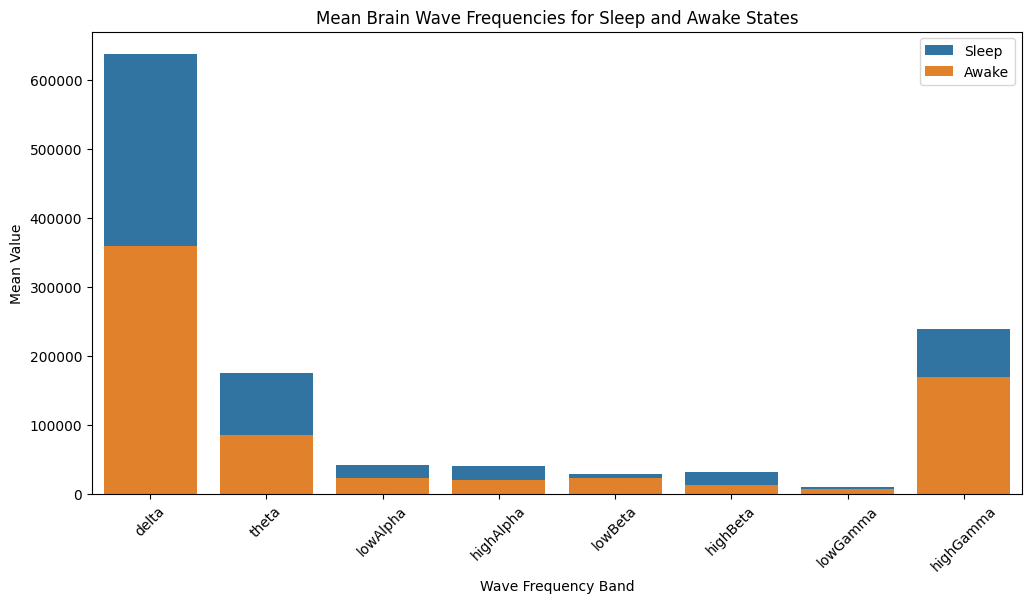

In [45]:
means_by_state = df.groupby('classification')[['delta', 'theta', 'lowAlpha', 'highAlpha',
                                                 'lowBeta', 'highBeta', 'lowGamma', 'highGamma']].mean()


means_by_state = means_by_state.T.reset_index()
means_by_state.columns = ['Wave Frequency Band', 'Sleep', 'Awake']
bands_order = ['delta', 'theta', 'lowAlpha', 'highAlpha',
               'lowBeta', 'highBeta', 'lowGamma', 'highGamma']

means_by_state = means_by_state[means_by_state['Wave Frequency Band'].isin(bands_order)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Wave Frequency Band', y='Sleep', data=means_by_state, label='Sleep')
sns.barplot(x='Wave Frequency Band', y='Awake', data=means_by_state, label='Awake')

plt.xlabel('Wave Frequency Band')
plt.ylabel('Mean Value')
plt.title('Mean Brain Wave Frequencies for Sleep and Awake States')
plt.legend()

plt.xticks(rotation=45)
plt.show()

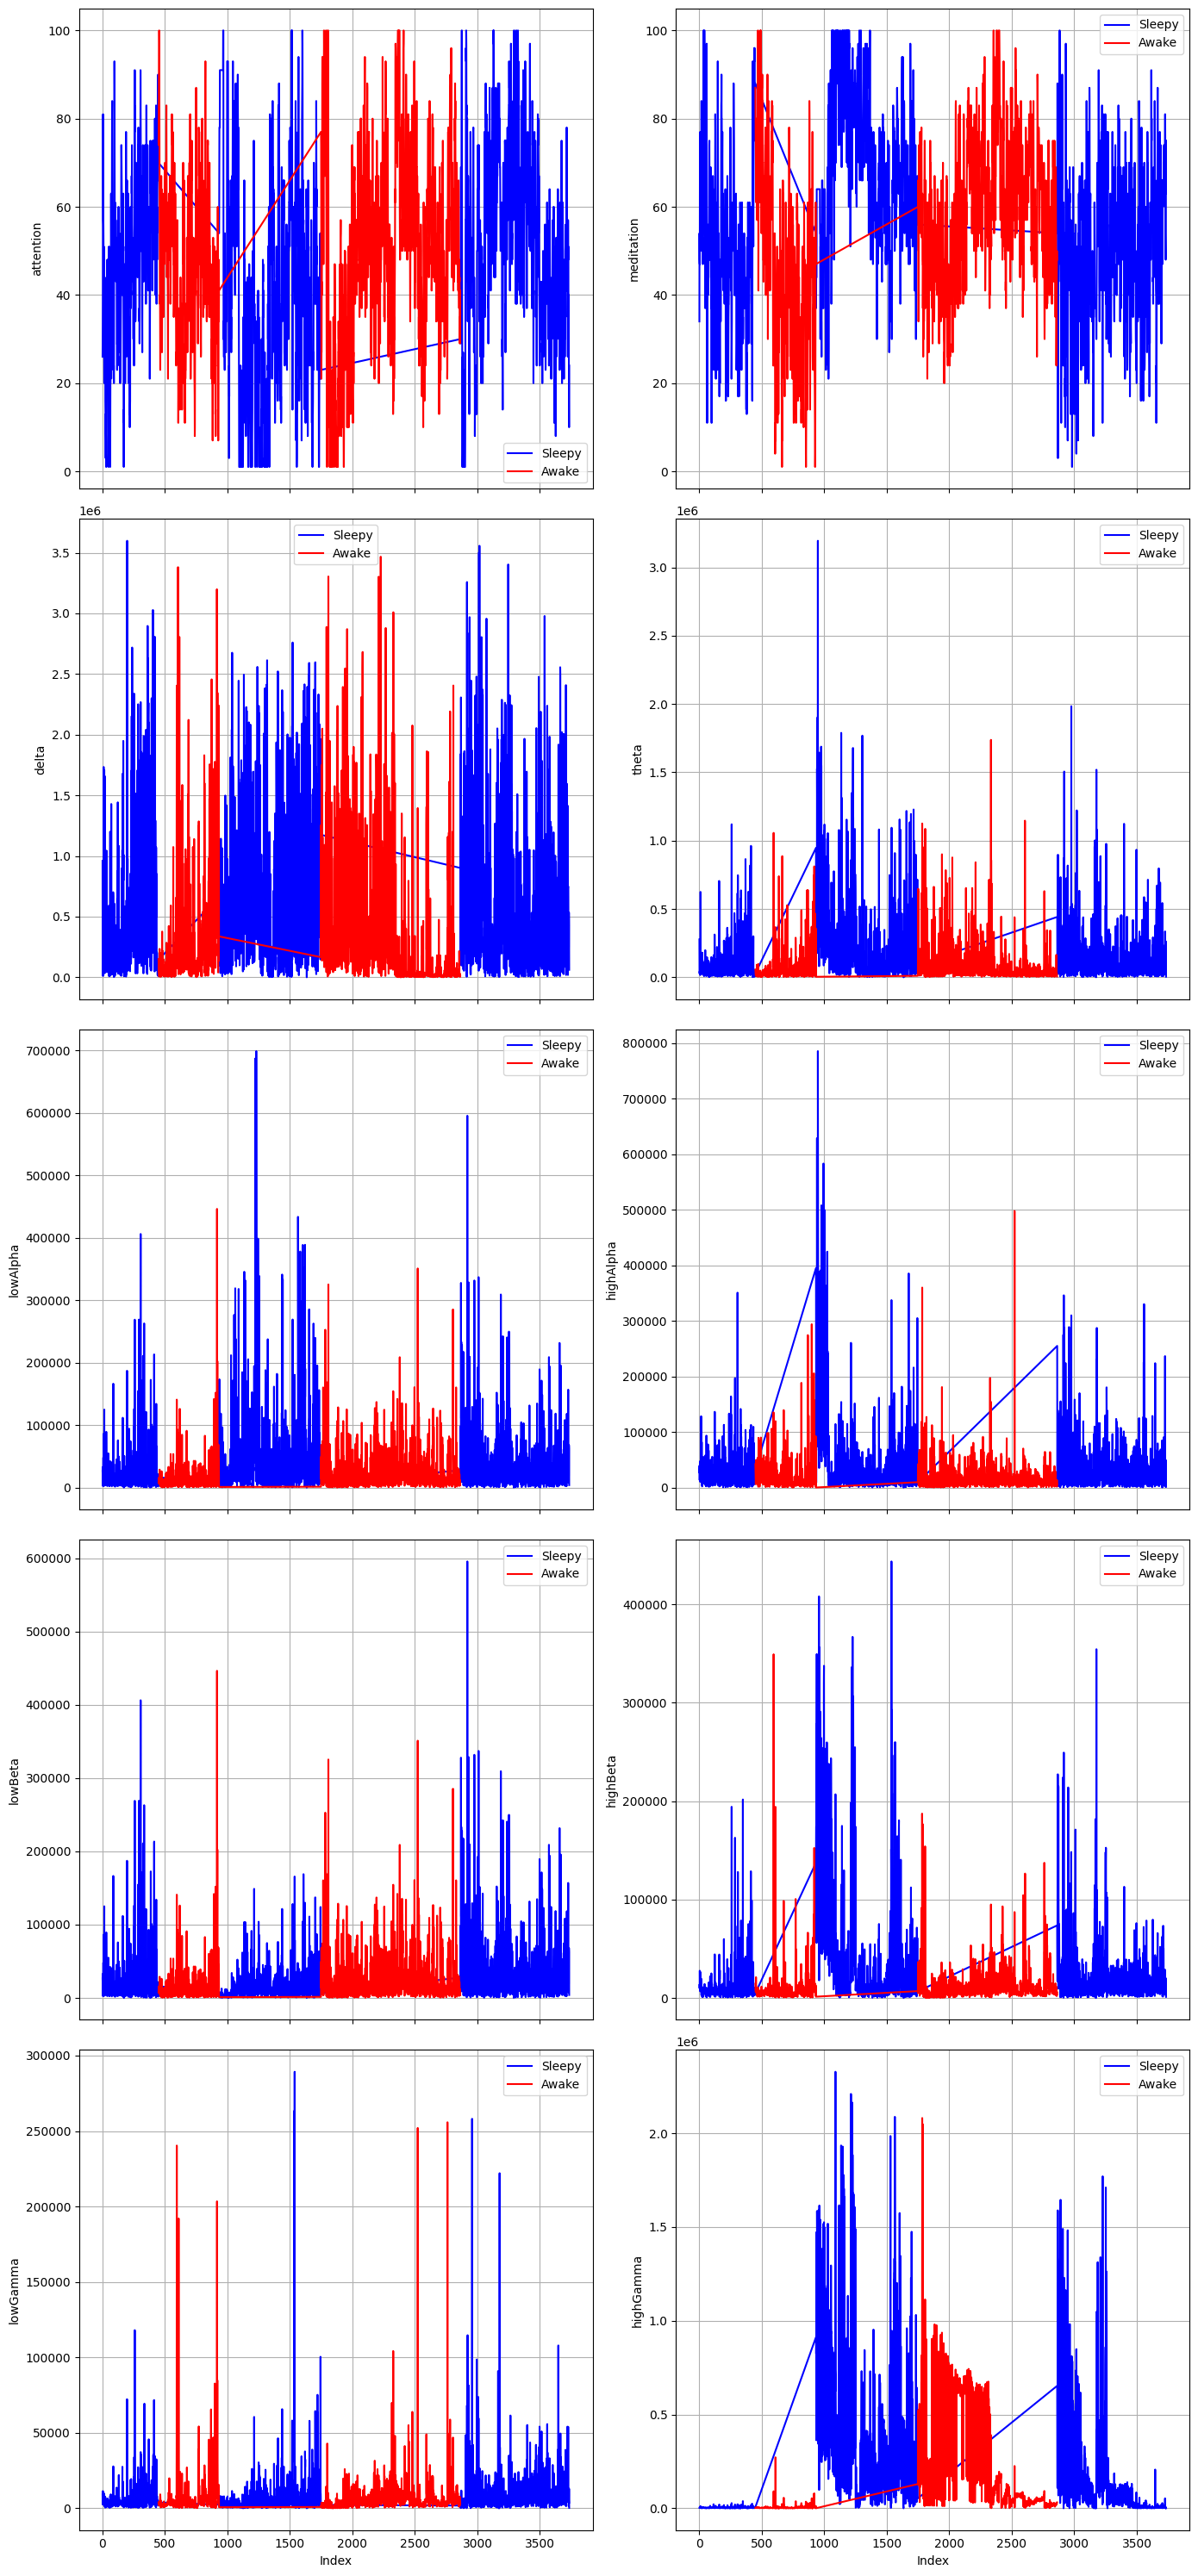

In [46]:
classification_var = 'classification'

df_class_0 = df[df[classification_var] == 0]
df_class_1 = df[df[classification_var] == 1]

columns_to_plot = [col for col in df.columns if col != classification_var]

num_plots = len(columns_to_plot)

num_rows = (num_plots + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 6 * num_rows), sharex=True)

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    ax.plot(df_class_0.index, df_class_0[col], 'b-', label='Sleepy')
    ax.plot(df_class_1.index, df_class_1[col], 'r-', label='Awake')
    ax.set_ylabel(col)
    ax.legend()
    ax.grid(True)

for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

axes[-2].set_xlabel('Index')
axes[-1].set_xlabel('Index')

plt.tight_layout()

plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
X = df.drop(['classification'],axis=1)
y = df['classification']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

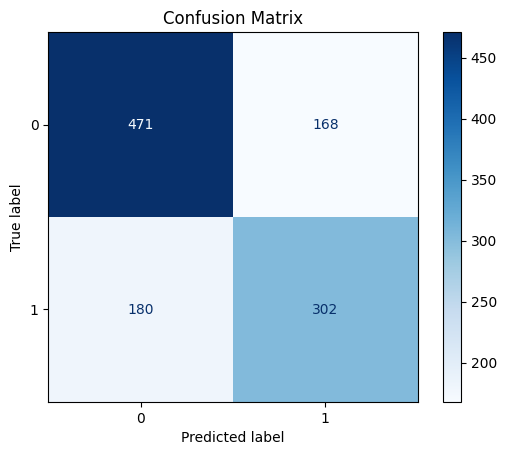

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

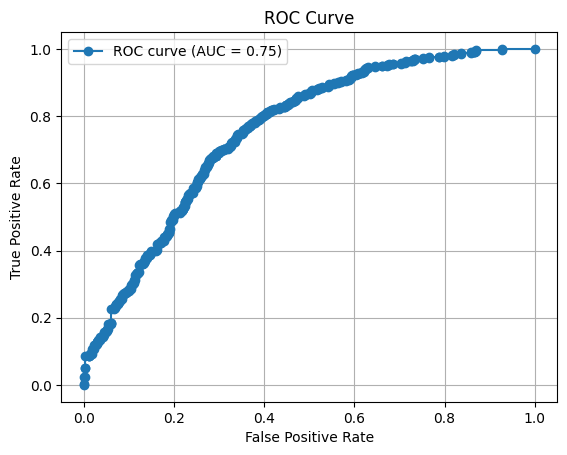

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, marker='o', label=f'ROC curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

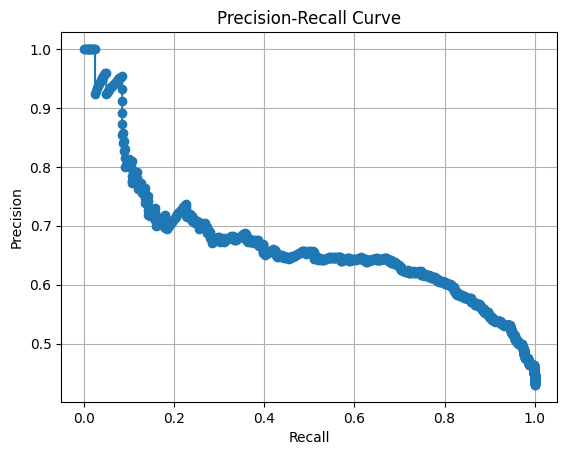

In [54]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


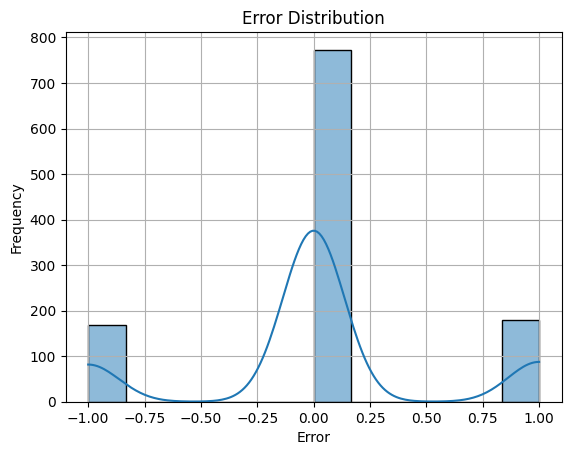

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute errors
errors = y_test - y_pred

# Plot error distribution
plt.figure()
sns.histplot(errors, kde=True)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.grid(True)
plt.show()

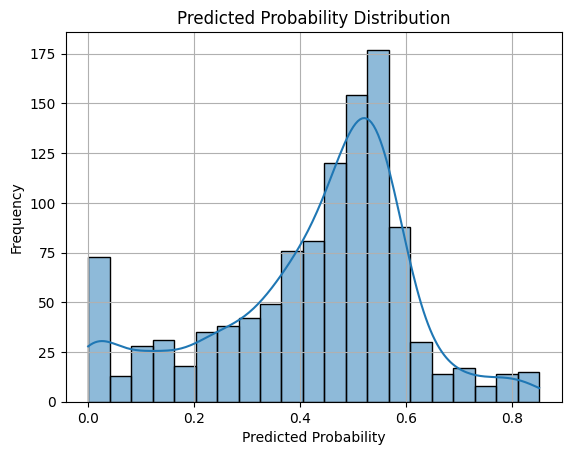

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of predicted probabilities
plt.figure()
sns.histplot(y_prob, kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution')
plt.grid(True)
plt.show()

In [60]:
model.coef_

array([[ 0.05998077, -0.12335503, -0.42954544, -0.16446752, -1.97578759,
        -0.43717894,  1.48679313, -0.91112323,  0.33053643,  0.65134627]])

<ipython-input-61-e55f3fe00a07>:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


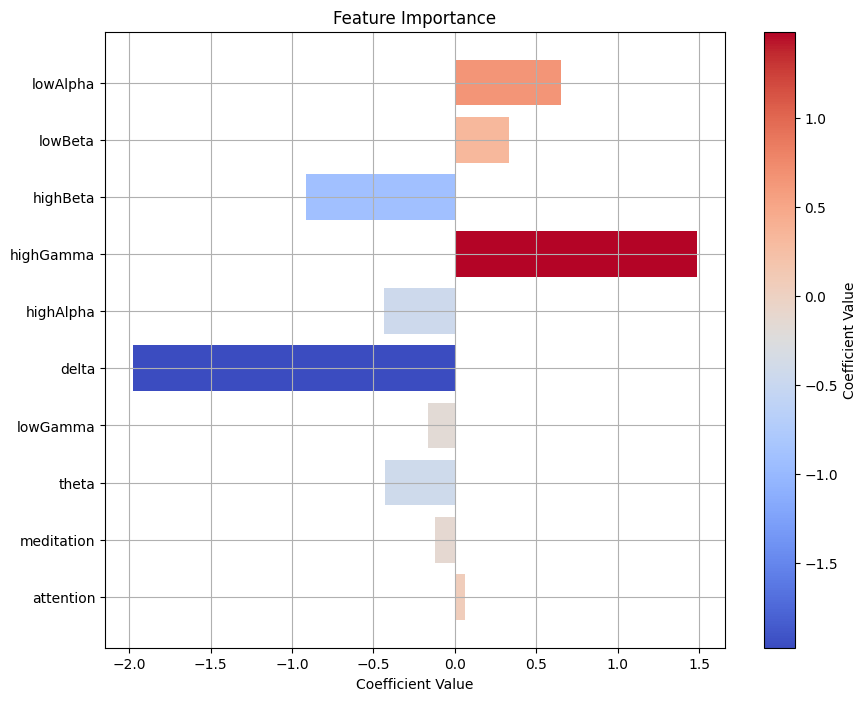

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

feature_names = df_non_outliers.columns
coefficients = model.coef_[0]

cmap = plt.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=min(coefficients), vmax=max(coefficients))

# Plot feature importance
plt.figure(figsize=(10, 8))

# Draw horizontal bar plot
bars = plt.barh(range(len(coefficients)), coefficients, color=cmap(norm(coefficients)), align='center')

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Coefficient Value')

# Sort indices for display
sorted_indices = np.argsort(np.abs(coefficients))
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.grid(True)

plt.show()

In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [63]:
y_pred = model.predict(X_test_scaled)